# Data exploration + preparation

In this jupyter notebook the data for the experiments is explored, and prepared. The preparation inlcudes the splitting of the original dataset into datasets of different balance ratios. 

The original dataset can be found under the following link: https://www.kaggle.com/bhadaneeraj/cardio-vascular-disease-detection

The publisher gives the following information about the dataset: 

### Citation:

License: Unknown

Domain: Public

Dataset owner: Svetlana Ulianova

Date created: 2019-01-20

## Features:

- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm) |
- Weight | Objective Feature | weight | float (kg) |
- Gender | Objective Feature | gender | categorical code |
- Systolic blood pressure | Examination Feature | ap_hi | int |
- Diastolic blood pressure | Examination Feature | ap_lo | int |
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
- Smoking | Subjective Feature | smoke | binary |
- Alcohol intake | Subjective Feature | alco | binary |
- Physical activity | Subjective Feature | active | binary |
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.

## The Problem Statement:
To build an application to classify the patients to be healthy or suffering from cardiovascular disease based on the given attributes.

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("./data/cardio_train.csv", sep=';')

df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  988  22469       1     155    69.0    130     80            2     2      0   
1  989  14648       1     163    71.0    110     70            1     1      0   
2  990  21901       1     165    70.0    120     80            1     1      0   
3  991  14549       2     165    85.0    120     80            1     1      1   
4  992  23393       1     155    62.0    120     80            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       1       0  
3     1       1       0  
4     0       1       0

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


The publisher already has pointed out the meaning of the columns. The dataset has 13 columns, of which 12 are integers, and one column has a float data type. 

The dataset has 69301 samples. All samples are filled, no sample has an empty value. 

The cardio column holds information whether a patient has a heart disease or not. Therefore, it hold the y-values. The other columns are combined the x-values. 

0    34679
1    34622
Name: cardio, dtype: int64

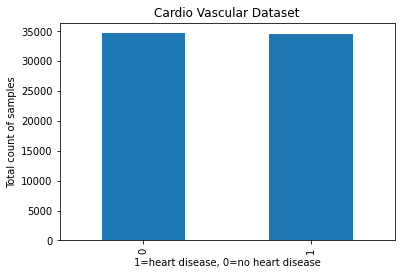

In [3]:
pd.value_counts(df['cardio']).plot.bar()
plt.title('Cardio Vascular Dataset')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Total count of samples')
df['cardio'].value_counts()

With a balance ratio of ~49% (34622/69301=0,4995887505), the dataset is almost perfeclty balanced. 

### Explore the columns unique values

For CTGAN descrete columns are an option to limit the algorithm to create values with a fenite number of values. This is helpful for categorical values, so that the algorithm does not create unrealistic data samples.

In the following the columns are explored, to detect descrete columns. 

In [4]:
unique_arr = df["id"].unique()
print(unique_arr)

[  988   989   990 ... 99996 99998 99999]


In [5]:
unique_arr = df["age"].unique()
print(unique_arr)

[22469 14648 21901 ... 14925 17727 17926]


In [6]:
unique_arr = df["gender"].unique()
print(unique_arr)

[1 2]


In [7]:
unique_arr = df["height"].unique()
print(unique_arr)

[155 163 165 164 162 161 157 158 153 169 150 176 154 159 146 167 170 151
 183 160 178 171 179 174 180 168 166 149 156 147 152 141 173 177 172 175
 148 144 185 181 195 140 182 198 186 145 187 143 196 138 184 142 194 190
 134 136 100 120 189 137 188 192 122 250 191 117  70  97 119 130 110 193
  75 132  71 135  67 125 139 133  74  98 112 207  68  55  81  80  64  91
  60 109  72 197  65 128 105 108 200 104 111 113  96 131  59  66  99  57]


In [8]:
unique_arr = df["weight"].unique()
print(unique_arr)

[ 69.    71.    70.    85.    62.    61.    72.    93.    68.    65.
  57.    82.    56.    60.    45.    90.    74.    88.    95.   103.
  80.    63.    55.    91.    77.    83.   113.   129.    81.    94.
  76.    96.   114.    79.    78.    73.    86.    58.    64.    87.
  75.    67.   124.   120.    84.    98.    51.   105.    42.   115.
  92.   116.    50.   100.   107.    59.    66.    49.    54.   123.
  89.    52.   110.   104.   108.   111.    53.    47.   102.    99.
 109.    46.   139.   101.   125.   150.   138.    48.    97.   106.
 131.   112.    43.    83.6  134.   106.5  142.   117.   121.    40.
 141.   119.   126.   177.   165.   122.    41.    62.3  118.    89.5
 132.   155.   130.   159.    84.6  140.    82.3   30.    67.9  127.
  67.5   74.3  149.   180.   128.    60.2   44.    64.5   58.7   90.5
  37.    80.8  166.   161.    92.2   75.6  136.    82.9  154.    68.9
 170.    84.5  135.    72.5  146.    70.5   74.2   84.3   38.    54.5
 145.    68.5   79.5   72.8   

In [9]:
unique_arr = df["ap_hi"].unique()
print(unique_arr)

[  130   110   120   100   140   160   170   150   147   115    90   180
    14   125   135   190   137   153    11   145   148   126   105   220
   119   141   165   164    12   124   172   902   162   906   117   134
   166   210   176   133   116   169    10   121    16    80   112   159
   122   113   118   200   155   142   131   157   136   146   138  -100
   909    70   109    85   106   129    93     7    95   179   161   156
   168   132   104   103   178   175   123   128   151    15   139 11500
   127    17   108   144   158   102     1  1420    13   143   701   107
   184   149   167   114   101    60  1500   181   171   202  -115   111
   907    20   188   185   163   173   154   177  -140   174  -120 14020
  1400   240   191   197  1620   152    96   199  -150  1130   193    99
   196   309   401 16020  1202   806  1300   230   207   215    97  1409
 11020    24   960 13010  1110   195  1205   187  2000]


In [10]:
unique_arr = df["ap_lo"].unique()
print(unique_arr)

[   80    70    90   100  1000    60    79    78   110    84    75  1100
    85    86    87  1001    82    95    69    74    97    65   120    81
    73    89  1200    83   119    50     0    93   105 10000   150    99
    77    59  8044   140    92  1044   108   125   115    68    61   106
   102    91    94    66    52   170    76   160    62    30    96   130
   113    67  9100  1033    10    88   902     8   112   104    71    72
  1008    98  2088    20   802  8000  1022   850    40   708    57   101
  9011  1011    64  1007  1177  7100   109    45   709    63  8500   800
    58  1110  8099  1088   126  1077  1120     7   103  1125   180   121
  8100   710  5700  8079  1111  1003     6  1900   809   114   801  1002
    53   111     1   118    56   182   810     9  7099 11000  9800  8200
  1139   107   820    55  1400   190   900   122  6800   135   700    15
  1101   910  1140  1211   -70    54  8077   901   880   870   585    49
   602]


In [11]:
unique_arr = df["cholesterol"].unique()
print(unique_arr)

[2 1 3]


In [12]:
unique_arr = df["gluc"].unique()
print(unique_arr)

[2 1 3]


In [13]:
unique_arr = df["smoke"].unique()
print(unique_arr)

[0 1]


In [14]:
unique_arr = df["alco"].unique()
print(unique_arr)

[0 1]


In [15]:
unique_arr = df["active"].unique()
print(unique_arr)

[1 0]


In [16]:
unique_arr = df["cardio"].unique()
print(unique_arr)

[0 1]


This has shown, that "gender", "cholesterol", "gluc", "smoke", "alco", "active", and "cardio" hold data that is categroical and therefore descrete. 

For the CTGAN algorithm these columns are set as descrete. 

# Data preparation

The data does not need to be cleaned or prapared for splitting up to 12 datasets, as the dataset, already fulfills all requirements. 

# Dataset creation

To create datasets with different balance ratios, random samples of the column cardio with the value 1 are selected, and combined with all samples of cardio = 0. Therefore, the final datasets have the following balance ratio: 

49%, 44%, 39%, 34%, 29%, 24%, 19%, 14%, 9%, 4%, 1%, 0,1%

In [19]:
df['cardio'].value_counts()

0    34679
1    34622
Name: cardio, dtype: int64

In [20]:
samples_0 = df[df['cardio'] == 0]
samples_0['cardio'].value_counts()

0    34679
Name: cardio, dtype: int64

In [21]:
samples_1 = df[df['cardio'] == 1]
samples_1['cardio'].value_counts()

1    34622
Name: cardio, dtype: int64

### Creating a dataset with a balance ratio of 44%

In [22]:
df.to_csv('cardio_49.csv', index = False, encoding='utf-8')

In [17]:
samples_1 = samples_1.sample(n = 50)
samples_0 = samples_0.sample(n = 400)
df_sm1 = samples_1.append(samples_0)
df_sm1.to_csv('df_sm2.csv', index = False, encoding='utf-8')

In [20]:
samples_1_44 = samples_1.sample(n = 27500)
df_44 = samples_1_44.append(samples_0)
df_44.to_csv('cardio_44.csv', index = False, encoding='utf-8')

### Creating a dataset with a balance ratio of 39%

In [21]:
samples_1_39 = samples_1.sample(n = 22500)
df_39 = samples_1_39.append(samples_0)
df_39.to_csv('cardio_39.csv', index = False, encoding='utf-8')

### Creating a dataset with a balance ratio of 34%

In [22]:
samples_1_34 = samples_1.sample(n = 18000)
df_34 = samples_1_34.append(samples_0)
df_34.to_csv('cardio_34.csv', index = False, encoding='utf-8')

### Creating a dataset with a balance ratio of 29%

In [23]:
samples_1_29 = samples_1.sample(n = 14400)
df_29 = samples_1_29.append(samples_0)
df_29.to_csv('cardio_29.csv', index = False, encoding='utf-8')

### Creating a dataset with a balance ratio of 24%

In [24]:
samples_1_24 = samples_1.sample(n = 11000)
df_24 = samples_1_24.append(samples_0)
df_24.to_csv('cardio_24.csv', index = False, encoding='utf-8')

### Creating a dataset with a balance ratio of 19%

In [25]:
samples_1_19 = samples_1.sample(n = 8350)
df_19 = samples_1_19.append(samples_0)
df_19.to_csv('cardio_19.csv', index = False, encoding='utf-8')

### Creating a dataset with a balance ratio of 14%

In [26]:
samples_1_14 = samples_1.sample(n = 5700)
df_14 = samples_1_14.append(samples_0)
df_14.to_csv('cardio_14.csv', index = False, encoding='utf-8')

### Creating a dataset with a balance ratio of 9%

In [27]:
samples_1_9 = samples_1.sample(n = 3500)
df_9 = samples_1_9.append(samples_0)
df_9.to_csv('cardio_9.csv', index = False, encoding='utf-8')

### Creating a dataset with a balance ratio of 4%

In [28]:
samples_1_4 = samples_1.sample(n = 1600)
df_4 = samples_1_4.append(samples_0)
df_4.to_csv('cardio_4.csv', index = False, encoding='utf-8')

### Creating a dataset with a balance ratio of 1%

In [29]:
samples_1_1 = samples_1.sample(n = 360)
df_1 = samples_1_1.append(samples_0)
df_1.to_csv('cardio_1.csv', index = False, encoding='utf-8')

### Creating a dataset with a balance ratio of 0,1%

In [30]:
samples_1_01 = samples_1.sample(n = 36)
df_01 = samples_1_01.append(samples_0)
df_01.to_csv('cardio_01.csv', index = False, encoding='utf-8')